In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/validation'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [5]:
print(train)

                                image    label
0         images/train/happy/3578.jpg    happy
1        images/train/happy/16988.jpg    happy
2         images/train/happy/2666.jpg    happy
3         images/train/happy/5109.jpg    happy
4        images/train/happy/11981.jpg    happy
...                               ...      ...
28816  images/train/disgust/10112.jpg  disgust
28817  images/train/disgust/21668.jpg  disgust
28818   images/train/disgust/7049.jpg  disgust
28819   images/train/disgust/9716.jpg  disgust
28820   images/train/disgust/3561.jpg  disgust

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [7]:
# print(test)
# print(test['image'])

print(test.shape)
print(train.shape)

(7066, 2)
(28821, 2)


In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale' )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

x_train dimensions: (28821, 48, 48, 1)


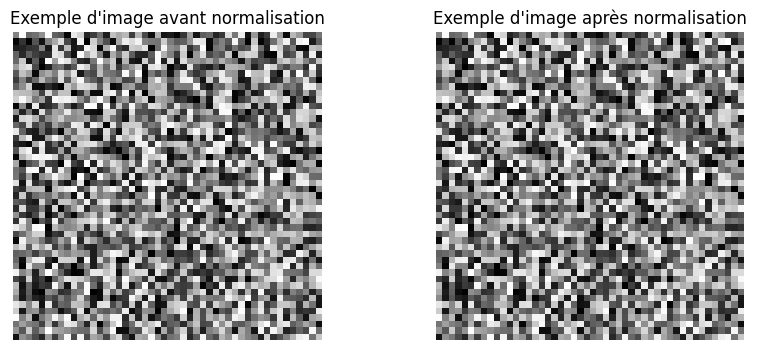

In [11]:

import numpy as np
import matplotlib.pyplot as plt

# Générer des données simulées correspondant au nombre d'échantillons dans y_train
train_features = np.random.randint(0, 256, (28821, 48, 48, 1), dtype=np.uint8)

# Normaliser les valeurs des pixels en les divisant par 255.0
x_train = train_features / 255.0

# Afficher les dimensions pour vérifier
print(f"x_train dimensions: {x_train.shape}")

# Visualiser un échantillon avant et après normalisation
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Exemple d'image avant normalisation")
plt.imshow(train_features[0].reshape(48, 48), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Exemple d'image après normalisation")
plt.imshow(x_train[0].reshape(48, 48), cmap='gray')
plt.axis('off')

plt.show()


In [12]:
# (nb total d'image, hauteur, largeur, nb de canaux)
print(train_features.shape)

# print(train_features[0])
print("---")
print(train_features[1])

(28821, 48, 48, 1)
---
[[[223]
  [146]
  [213]
  ...
  [ 60]
  [ 87]
  [173]]

 [[168]
  [139]
  [119]
  ...
  [ 51]
  [ 61]
  [141]]

 [[100]
  [159]
  [218]
  ...
  [137]
  [157]
  [135]]

 ...

 [[173]
  [157]
  [204]
  ...
  [200]
  [176]
  [105]]

 [[ 72]
  [ 77]
  [142]
  ...
  [223]
  [ 15]
  [240]]

 [[251]
  [  7]
  [ 75]
  ...
  [ 84]
  [  6]
  [250]]]


In [13]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Générer des données simulées correspondant au nombre d'échantillons dans y_train
train_features = np.random.randint(0, 256, (28821, 48, 48, 1), dtype=np.uint8)

# Normaliser les valeurs des pixels en les divisant par 255.0
x_train = train_features / 255.0

# Afficher les dimensions pour vérifier
print(f"x_train dimensions: {x_train.shape}")

# Visualiser un échantillon avant et après normalisation
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Exemple d'image avant normalisation")
plt.imshow(train_features[0].reshape(48, 48), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Exemple d'image après normalisation")
plt.imshow(x_train[0].reshape(48, 48), cmap='gray')
plt.axis('off')

plt.show()


In [14]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
print(train['label'])

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

In [18]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [19]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:
model = Sequential()
# convolutional layers
# model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [ ]:
print(x_train.shape)
print(y_train.shape)

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 30, validation_data = (x_test,y_test))
model.save('modelIA.h5')

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [ ]:

from tensorflow.keras.models import load_model

# Charger directement le modèle enregistré au lieu d'utiliser un fichier JSON
model = load_model("facialemotionmodel.h5")
print("Modèle chargé avec succès.")

# Optionnel : Afficher le résumé du modèle pour vérifier
model.summary()


In [23]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [24]:
def ef(image):
    img = load_img(image,color_mode='grayscale' )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Trouver les classes réelles
true_classes = np.argmax(y_test, axis=1)

# Calculer le pourcentage de réussite
accuracy = np.mean(predicted_classes == true_classes) * 100
print(f"Accuracy : {accuracy:.2f}%")